In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
def f(x):
    return 2 -3*x**2 + 4*x**4

In [3]:
def f_kde(x, x_rnd, weights, sigma=0.1):
    x = x.T * np.ones([len(x_rnd), len(x)])
    x_rnd = x_rnd.reshape(len(x_rnd), 1)
    weights = weights.reshape(len(weights), 1)
    x_dist = (x - x_rnd)
    f_kde_contribution = weights * norm.pdf(x_dist, 0, sigma)
    f_kde = f_kde_contribution.sum(axis=0)
    var_f_kde = np.sqrt((f_kde_contribution**2).sum(axis=0))
    return f_kde, var_f_kde

In [4]:
rng = np.random.default_rng()

In [5]:
x_rnd = rng.uniform(0, 1, 10000)
f_rnd = f(x_rnd)/len(x_rnd)

Text(0.5, 1.0, 'Test with N random = 10000')

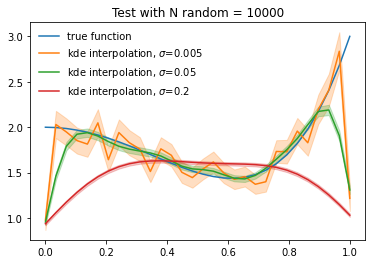

In [6]:
x_test = np.linspace(0., 1, 30)
plt.plot(x_test, f(x_test), label='true function')
for sigma in [0.005, 0.05, 0.2]:
# for sigma in [0.05]:
    f_est, var = f_kde(x_test, x_rnd, f_rnd, sigma)
    plt.plot(x_test, f_est, label=f'kde interpolation, $\sigma$={sigma}')
    plt.fill_between(x_test, f_est-var, f_est+var, alpha=0.25, color=plt.gca().lines[-1].get_color(), interpolate=True)
plt.legend(frameon=False)
plt.title('Test with N random = 10000')

In [28]:
# playing with a counting experiment
x_rnd, y_rnd = rng.uniform(0, 1, 100000), rng.uniform(0, f(1), 100000)

In [29]:
f_rnd = f(x_rnd)
x_good_rnd = x_rnd[y_rnd < f_rnd]
w_rnd = np.ones(len(x_good_rnd)) * len(x_good_rnd)/len(x_rnd) * f(1) / len(x_good_rnd)

Text(0.5, 1.0, 'Test with N random = 10000')

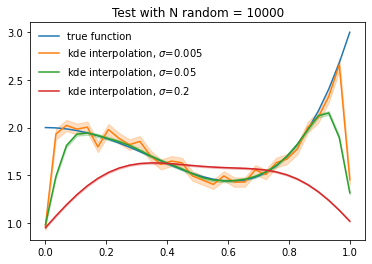

In [30]:
x_test = np.linspace(0, 1, 30)
plt.plot(x_test, f(x_test), label='true function')
for sigma in [0.005, 0.05, 0.2]:
    f_est, var = f_kde(x_test, x_good_rnd, w_rnd, sigma)
    plt.plot(x_test, f_est, label=f'kde interpolation, $\sigma$={sigma}')
    plt.fill_between(x_test, f_est-var, f_est+var, alpha=0.25, color=plt.gca().lines[-1].get_color(), interpolate=True)
    # plt.plot(x_test, len(x_good_rnd)/len(x_rnd) * f(1)*sum_kde(x_test, x_good_rnd, sigma), label=f'kde interpolation, $\sigma$={sigma}')
plt.legend(frameon=False)
plt.title('Test with N random = 10000')

In [31]:
# add a selection variable

In [32]:
def y(x):
    return rng.normal(x**2 -1, 1)

In [33]:
y_rnd = y(x_good_rnd)
rnd_passed = y_rnd > 0

x_rnd_passed = x_good_rnd[rnd_passed]
y_rnd_passed = y_rnd[rnd_passed]
w_rnd_passed = w_rnd[rnd_passed]

(0.0, 1.0)

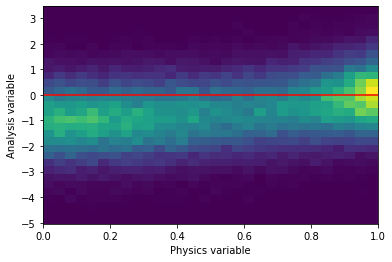

In [54]:
plt.hist2d(x_good_rnd, y_rnd, bins=(30, 30))
plt.xlabel('Physics variable')
plt.ylabel('Analysis variable')
plt.hlines(0, 0, 1, 'r')
plt.xlim(0, 1)

Text(0.5, 1.0, 'Test with N random = 100000')

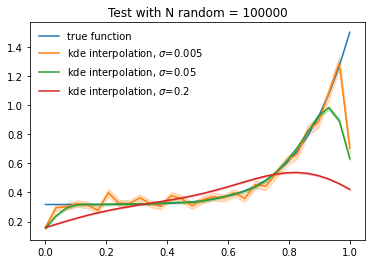

In [44]:
x_test = np.linspace(0, 1, 30)
plt.plot(x_test, f(x_test)*(1-norm.cdf(0, x_test**2-1, 1)), label='true function')
for sigma in [0.005, 0.05, 0.2]:
    f_est, var = f_kde(x_test, x_rnd_passed, w_rnd_passed, sigma)
    plt.plot(x_test, f_est, label=f'kde interpolation, $\sigma$={sigma}')
    plt.fill_between(x_test, f_est-var, f_est+var, alpha=0.25, color=plt.gca().lines[-1].get_color(), interpolate=True)
    # plt.plot(x_test, len(x_good_rnd)/len(x_rnd) * f(1)*sum_kde(x_test, x_good_rnd, sigma), label=f'kde interpolation, $\sigma$={sigma}')
plt.legend(frameon=False)
plt.title('Test with N random = 100000')

In [59]:
x = np.arange(1, 11).reshape(5, 2)

In [63]:
x = x[np.newaxis, ...]

In [64]:
x.shape

(1, 5, 2)

In [42]:
x_i = np.random.uniform(size=(1000, 2))

In [43]:
x_i.shape

(1000, 2)

In [53]:
list(range(1, len(aux.shape)))

[1, 2]

In [56]:
x_i = np.expand_dims(x_i, axis=list(range(1, len(aux.shape))))

In [57]:
x_i.shape

(1000, 1, 1, 2)

In [41]:
x_eval = (aux - x_i)

In [75]:
x_i = x_i[:, np.newaxis, :]

In [76]:
x_i

array([[[0.66503341, 0.92352743]],

       [[0.49146134, 0.63130128]],

       [[0.19073214, 0.74410702]],

       ...,

       [[0.93511245, 0.85513642]],

       [[0.98046612, 0.18624256]],

       [[0.04223842, 0.27446044]]])

In [78]:
x_eval = (x - x_i)

In [80]:
x_eval.shape

(1000, 5, 2)

In [55]:
x_eval_mod = np.swapaxes(x_eval, 1, 2)

In [56]:
x_eval_mod.shape

(1000, 5, 2)

In [34]:
from scipy.stats import norm, uniform, multivariate_normal

In [48]:
smoothing = np.diag([30, 10])**2

In [49]:
smoothing.shape

(2, 2)

In [50]:
x

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [82]:
multivariate_normal.pdf(x_eval, cov=smoothing)

array([[0.00052742, 0.00050447, 0.00046154, 0.0004039 , 0.0003381 ],
       [0.00052549, 0.0004995 , 0.00045416, 0.00039498, 0.00032858],
       [0.00052616, 0.00050093, 0.00045618, 0.00039736, 0.00033109],
       ...,
       [0.00052705, 0.00050373, 0.0004605 , 0.00040269, 0.00033683],
       [0.00052186, 0.00049219, 0.00044402, 0.00038316, 0.00031626],
       [0.00052241, 0.00049255, 0.00044421, 0.00038319, 0.00031619]])

In [3]:
mz_span = np.linspace(0.01, 0.1, 11)

In [4]:
m4_span = np.linspace(0.11, 0.5, 10)

In [5]:
xv, yv = np.meshgrid(m4_span, mz_span)

In [7]:
xv.shape

(11, 10)

In [8]:
yv.shape

(11, 10)

In [48]:
aux = np.stack([xv, yv], axis=-1)

In [20]:
aux.shape

(11, 10, 2)

In [16]:
aux.reshape(-1, aux.shape[-1])

array([[0.11      , 0.01      ],
       [0.15333333, 0.01      ],
       [0.19666667, 0.01      ],
       [0.24      , 0.01      ],
       [0.28333333, 0.01      ],
       [0.32666667, 0.01      ],
       [0.37      , 0.01      ],
       [0.41333333, 0.01      ],
       [0.45666667, 0.01      ],
       [0.5       , 0.01      ],
       [0.11      , 0.019     ],
       [0.15333333, 0.019     ],
       [0.19666667, 0.019     ],
       [0.24      , 0.019     ],
       [0.28333333, 0.019     ],
       [0.32666667, 0.019     ],
       [0.37      , 0.019     ],
       [0.41333333, 0.019     ],
       [0.45666667, 0.019     ],
       [0.5       , 0.019     ],
       [0.11      , 0.028     ],
       [0.15333333, 0.028     ],
       [0.19666667, 0.028     ],
       [0.24      , 0.028     ],
       [0.28333333, 0.028     ],
       [0.32666667, 0.028     ],
       [0.37      , 0.028     ],
       [0.41333333, 0.028     ],
       [0.45666667, 0.028     ],
       [0.5       , 0.028     ],
       [0.